### dl2 demo
All the things we can do with dl2.

In [1]:
import dl2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
w1 = np.array([4., 3., 1., 5., 3., 1.])
w2 = np.array([5., 2., 3., 3., 2., 1.])
b = np.array([2., 5., 2., 6., 2., 2.])
x = np.array([1., 4., 1., 3., 3., 3.])
y = np.array([4., 3., 8., 1., 4., 1.])
f = lambda w1, w2, b: w1 * x ** 2 + w2 * x + b
print(f(w1, w2, b))

[11. 61.  6. 60. 35. 14.]


In [3]:
opt = dl2.GD([w1, w2, b], lr=1e-3, beta=0.1)
losses, grads = [], []

In [4]:
print(f'before training\npred: {f(w1, w2, b)}\ny: {y}]\nloss: {0.5 * np.sum((f(w1, w2, b) - y) ** 2)}\n')
for epoch in range(1000):
    dy = f(w1, w2, b) - y # gradient of loss w.r.t to output
    loss = 0.5 * np.sum(dy ** 2) # compute loss
    losses.append(loss)
    grads.append(np.sum(dy))
    dw1, dw2, db = 2 * dy * x ** 2, dy * x, dy # gradient of loss w.r.t to each parameter
    opt.dP = [dw1, dw2, db] # store gradients in optimizers
    w1, w2, b = opt.step() # update parameters and return
print(f'\nafter training\npred: {f(w1, w2, b)}\ny: {y}\nloss: {0.5 * np.sum((f(w1, w2, b) - y) ** 2)}')

before training
pred: [11. 61.  6. 60. 35. 14.]
y: [4. 3. 8. 1. 4. 1.]]
loss: 4014.0


after training
pred: [4.0812554  3.         7.97678417 1.         4.         1.        ]
y: [4. 3. 8. 1. 4. 1.]
loss: 0.0035707075871568798


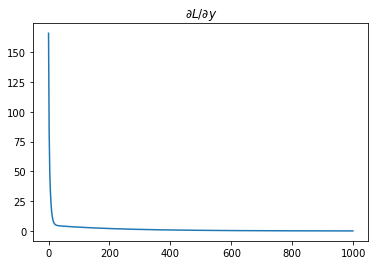

In [5]:
plt.title('$\partial L/\partial y$')
plt.plot(grads)
plt.show()

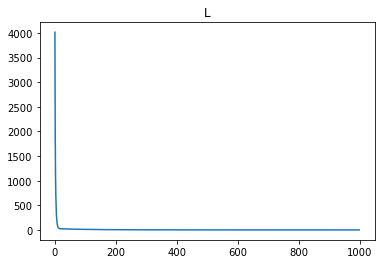

In [6]:
plt.title('L')
plt.plot(losses)
plt.show()

### Linear regression using gradient descent

{'input_dim': 10, 'output_dim': 1, 'layer': 'dense', 'activation': 'none', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 11


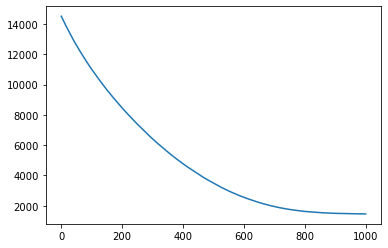

In [7]:
# sci-kit learn's diabetes dataset

x_train, y_train = datasets.load_diabetes(return_X_y=True)
x_train, y_train = dl2.normalize(x_train), np.expand_dims(y_train, 1)

model = dl2.NN() # initialize a net
model.add(dl2.dense(1, input_dim=10)) # add layers
model.init() # initialize weights, biases and # trainable params
model.info() # print model architecture and # trainable params

model.opt, model.loss_fn = dl2.Adagrad(model.params(), 1e-2), 'mse' # initialize optimizer and loss function
model.tqdm_disable = True
history = model.fit(x_train, y_train, batch_size=5, epochs=1000, shuffle=True) # train the model
plt.plot(history['losses']) # plot losses
plt.show() 

### Logistic regression using gradient descent

{'input_dim': 30, 'output_dim': 1, 'layer': 'dense', 'activation': 'sigmoid', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 31


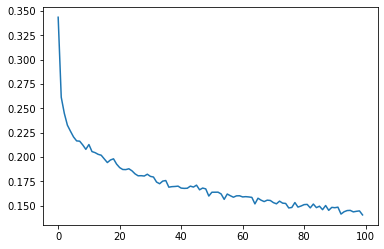

accuracy - 93.85 %


In [8]:
# sci-kit learn's breast cancer dataset

x_train, y_train = datasets.load_breast_cancer(return_X_y=True)
x_train, y_train = dl2.normalize(x_train), np.expand_dims(y_train, 1)

model = dl2.NN()
model.add(dl2.dense(1, input_dim=30, activation='sigmoid'))
model.init()
model.info()

model.opt, model.loss_fn = dl2.Adagrad(model.params(), 1e-1), 'ce' # ce - cross entropy loss
model.tqdm_disable = True
history = model.fit(x_train, y_train, batch_size=2, epochs=100, shuffle=True) 
plt.plot(history['losses'])
plt.show()

ct = 0
for x, y in zip(x_train, y_train):
    ct += round(model.forward(x)[0]) == y[0]
print(f'accuracy - {round(100 * ct / 569, 2)} %')

### Composing neural networks (fractal nets, LSTMs, RNNs, GRUs...)
Neural networks are simply function approximators. Multi-layer perceptrons are mappings between two vector spaces - $f:\mathbb{R}^X\rightarrow\mathbb{R}^Y$ i.e, they are REALLY complicated non-linear transformations - $f(\vec{x})$. Below is demonstration of composing two neural networks. It's no different from composing two functions. 

In [9]:
def net_sup():
    net_sup = dl2.NN()
    net_sup.add(dl2.dense(100, input_dim=20, activation='lrelu'))
    net_sup.add(dl2.expand(reshape=(10, 10, 1)))
    net_sup.add(dl2.conv2dT(channels=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sup.add(dl2.poolT(pool_size=(2, 2), strides=(2, 2)))
    net_sup.add(dl2.conv2d(filters=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sup.add(dl2.avg_pool(pool_size=(2, 2), strides=(2, 2)))
    net_sup.add(dl2.flatten())
    net_sup.add(dl2.dense(10, activation='lrelu'))
    net_sup.init()
    return net_sup

In [10]:
def net_sub():
    net_sub = dl2.NN()
    net_sub.add(dl2.dense(100, input_dim=10, activation='lrelu'))
    net_sub.add(dl2.expand(reshape=(10, 10, 1)))
    net_sub.add(dl2.conv2dT(channels=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sub.add(dl2.poolT(pool_size=(2, 2), strides=(2, 2)))
    net_sub.add(dl2.conv2d(filters=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sub.add(dl2.conv2d(filters=1, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sub.add(dl2.flatten())
    net_sub.add(dl2.dense(10, activation='lrelu'))
    net_sub.init()
    return net_sub

In [11]:
x = np.random.uniform(-1, 1, 20)
x

array([-0.17843723,  0.20231893,  0.59577676, -0.04493593, -0.73481815,
       -0.47748243, -0.73188231, -0.85119916, -0.86737532,  0.96003453,
       -0.26270633, -0.11275205,  0.90538043, -0.69290207, -0.95693693,
       -0.83019464,  0.41658313, -0.14469425,  0.72156335, -0.21513255])

In [12]:
sub_net1, sub_net2 = net_sub(), net_sub()
sup_net1, sup_net2 = net_sup(), net_sup()

In [13]:
def forward(x, sub_net1, sub_net2, sup_net1, sup_net2):
    sub_net1_z, sub_net2_z = sub_net1.forward(x[:10]), sub_net2.forward(x[10:])
    sub_net1_L, sub_net2_L = sub_net1.L, sub_net2.L
    
    sub_x = np.concatenate((sub_net1_z, sub_net2_z), axis=0)
    
    sup_net1_z, sup_net2_z = sup_net1.forward(sub_x), sup_net2.forward(sub_x)                                                                                                                                  
    sup_net1_L, sup_net2_L = sup_net1.L, sup_net2.L
    
    z = np.concatenate((sup_net1_z, sup_net2_z), axis=0) 
    
    return z, x, sub_net1_L, sub_net2_L, sup_net1_L, sup_net2_L

In [14]:
z, x, sub_net1_L, sub_net2_L, sup_net1_L, sup_net2_L = forward(x, sub_net1, sub_net2, sup_net1, sup_net2)
z

array([ 4.93250446e-01, -1.86015352e-04,  4.89618586e-01, -2.80870850e-04,
       -3.77300604e-03,  8.47250757e-01, -2.74109932e-03,  3.86509850e-01,
        7.36463586e-01, -2.39130980e-03,  5.64814654e-01, -9.02406078e-04,
        5.55242800e-01,  7.01954056e-01,  4.19490796e-01, -4.12517846e-03,
       -4.63714443e-03,  6.66275476e-01,  2.38163161e-01,  6.98475910e-01])

### another example

In [15]:
outer = dl2.NN()
outer.add(dl2.dense(10, input_dim=(1), activation='lrelu'))
outer.add(dl2.dense(10, activation='lrelu'))
outer.add(dl2.dense(1, activation='lrelu'))
outer.init()
outer.info()

{'input_dim': 1, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 1, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 141


In [16]:
inner = dl2.NN()
inner.add(dl2.dense(10, input_dim=(1), activation='lrelu'))
inner.add(dl2.dense(10, activation='lrelu'))
inner.add(dl2.dense(1, activation='lrelu'))
inner.init()
inner.info()

{'input_dim': 1, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 1, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 141


In [17]:
outer.loss_fn, inner.loss_fn = 'mse', 'none' # initialize loss functions for outer and inner network
x, w0, w1, w2, w3 = np.array([4.]), np.array([6.]), np.array([2.]), np.array([4.]), np.array([1.]) # parameters 

In [18]:
f = lambda x, w0, w1, w2, w3: w0 * outer.forward(w1 * x ** 2 + w2 * x + inner.forward(w3 * x)) # the comp graph
y = 10 # label

In [19]:
# dl2.GD(parameters, learning rate, beta)
opt = dl2.GD(outer.params() + inner.params() + [w0, w1, w2, w3], 1e-5, 0)
losses, grads = [], []

In [20]:
print(f'before training\npred: {f(x, w0, w1, w2, w3)[0]}\ny: {y}\nloss: {0.5 * np.sum((f(x, w0, w1, w2, w3) - y) ** 2)}\n')
for i in range(30):
    dy = f(x, w0, w1, w2, w3) - y # compute gradient of loss w.r.t to output
    loss = 0.5 * np.sum(dy ** 2) # compute loss
    losses.append(loss) 
    grads.append(np.sum(dy))
    outerdW, outerdB, dz = outer.backward(dy) # compute outer network gradients
    innerdW, innerdB, dz_ = inner.backward(dz) # compute inner network gradients
    dw0, dw1, dw2, dw3 = dy + y, dz * 2 * w1 * x * x, dz * x, dz * dz_ * x # compute other gradients
    opt.dP = [outerdW, outerdB, innerdW, innerdB, dw0, dw1, dw2, dw3]
    outer.W, outer.B, inner.W, inner.B, w0, w1, w2, w3 = opt.step() # update parameters
print(f'\nafter training\npred: {f(x, w0, w1, w2, w3)[0]}\ny: {y}\nloss: {0.5 * np.sum((f(x, w0, w1, w2, w3) - y) ** 2)}')

before training
pred: 11.556142097924756
y: 10
loss: 1.2107891144668301


after training
pred: 9.999503584230657
y: 10
loss: 1.2321430802598383e-07


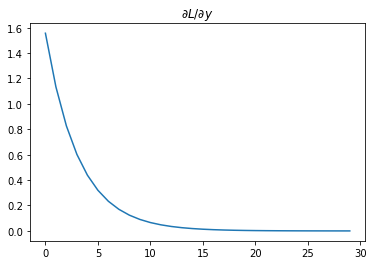

In [21]:
plt.title('$\partial L/\partial y$')
plt.plot(grads)
plt.show()

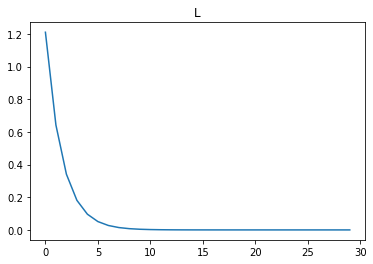

In [22]:
plt.title('L')
plt.plot(losses)
plt.show()